# 1. 多项式回归预测世界麻疹疫苗接种率
## 1.1 项目任务要求
任务描述：将“course-6-vaccine”世界麻疹疫苗接种数据集划分为训练集和测试集（训练集和测试集比例分别为：8:2；7:3；6:4），利用训练集分别结合线性回归、多项式回归建立预测模型，再利用测试集来预测世界麻疹疫苗接种率并验证预测模型的拟合能力。
具体任务要求如下：
1. 搜集并加载course-6-vaccine数据集。
2. 定义训练和测试使用的自变量和因变量。
3. 利用训练集建立线性回归模型。
4. 线性回归误差计算。
5. 多项式回归预测次数选择。
6. 利用训练集建立多项式回归预测模型。
7. 多项式回归预测模型拟合优度检验（确定系数R2）。
8. 利用测试集预测世界麻疹疫苗接种率并计算预测准确率。
9. 结果分析。

## 1.2 代码实现
首先导入数据，观察数据趋势，使用 `pandas` 导入数据，如果没有 `pandas`，可以使用以下命令安装：
```
conda activate ML
conda install pandas
```
解释：第一行指令激活 ML 虚拟环境，第二行指令使用conda安装pandas到ML中。

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("./dataset/course-6-vaccine.csv", header=0) # 导入数据为dataframe类型变量

print(df[:5])

   Year     Values
0  1983  48.676809
1  1984  50.653151
2  1985  45.603729
3  1986  45.511160
4  1987  52.882892


(34,)

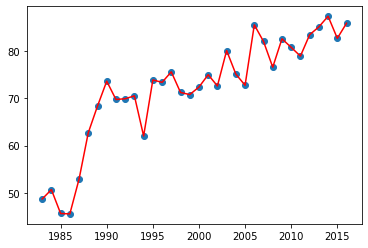

In [104]:
x = df['Year'] # 获取Year数据
y = df['Values'] # 获取 Values数据
plt.plot(x, y, 'r')
plt.scatter(x, y)

label = y.values # 获取值，返回ndarray
data = x.values
data.shape # 显示数据集大小 ps：这种写法只能在jupyter中使用，使用print(df[:5]) 即可

划分数据集分别占比为 6:4, 7:3, 8:2并开始训练，选择最合适的划分比例。

**下面是错误做法！！！**

**下面是错误做法！！！**

**下面是错误做法！！！**

错误原因：划分数据集时没有打乱

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LinearRegression()
size = len(data)
for i in range(6,9) :
    tr = int(size*i*0.1)
    model.fit(data[:tr].reshape(-1,1), label[:tr].reshape(-1,1))
    res = model.predict(data[tr:].reshape(-1,1))
    print("训练集：{}%，测试集：{}% 平均绝对误差: {} 均方误差: {} ".format(i*10,(10-i)*10, mean_absolute_error(label[tr:], res.flatten()), mean_squared_error(label[tr:], res.flatten())))

训练集：60%，测试集：40% 平均绝对误差: 8.671117512062198 均方误差: 93.79624543226323 
训练集：70%，测试集：30% 平均绝对误差: 6.011979515629853 均方误差: 43.53185829515393 
训练集：80%，测试集：20% 平均绝对误差: 5.806221323349703 均方误差: 37.7498758858217 


**分析：可以发现 8:2 的划分误差最小，下面使用 8:2 的方式进行多项式回归。**

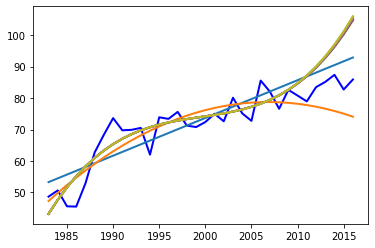

次数为: 1 r2= 0.7277743633473075
次数为: 2 r2= 0.802752510728978
次数为: 3 r2= 0.8340253921141507
次数为: 4 r2= 0.8340559912552132
次数为: 5 r2= 0.8340858518866249
次数为: 6 r2= 0.834114981600965
次数为: 7 r2= 0.8341433732847757
次数为: 8 r2= 0.8341710188644635
次数为: 9 r2= 0.8341979109991924


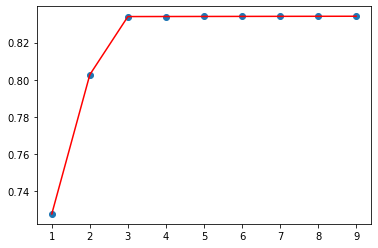

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

size = len(data)
tr = int(size*0.8) # 划分数据集为 8:2 
train_x = data[:tr].reshape(tr,1)
train_y = label[:tr].reshape(tr,1)
test_x = data[tr:].reshape(size - tr,1)
test_y = label[tr:].reshape(size - tr,1)

score = []
epoch = 10
plt.plot(data,label,color = 'blue',linewidth = 2)# 画出初始数据的图像

for m in range(1,epoch):
    model = make_pipeline(PolynomialFeatures(m, include_bias=True), LinearRegression()) # 循环选择次数为1-9的依次测试
    model.fit(train_x, train_y)
    res = model.predict(train_x) # 得到在训练集上的预测结果
    res2 = model.predict(data.reshape(size,1)) # 预测整个数据集的结果，用于画图
    score.append(r2_score(train_y,res)) # 计算训练集上的r2指标
    #score.append(r2_score(label,res2))
    # 绘出预测线    
    plt.plot(data,res2,linewidth = 2)
    
plt.show()
cnt = 0
for i in score : 
    cnt = cnt + 1
    print("次数为:",cnt, "r2=", i)
plt.plot([i for i in range(1, epoch)], score, 'r')
plt.scatter([i for i in range(1, epoch)], score)

**发现次数为3的时候基本达到最好的效果，选择次数为3的，评估模型在测试集上的效果**

**ps:其实上面的训练过程是错误的，后面会进行错误展示和分析。**


测试集上r2指标： -16.440752850940562


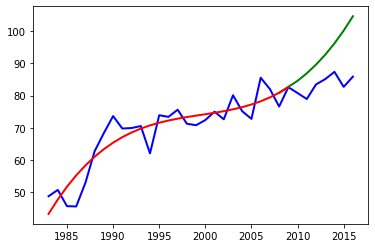

In [107]:
import numpy as np
model = make_pipeline(PolynomialFeatures(3, include_bias=True), LinearRegression()) # 选择次数为3的
model.fit(train_x, train_y)
res = model.predict(test_x) # 得到在训练集上的预测结果
print("测试集上r2指标：",r2_score(test_y,res))


# 数据可视化，红色为训练集上的预测，绿色为测试集上的预测
plt.plot(data,label,color = 'blue',linewidth = 2) # 得到源数据图像
y = model.predict(train_x.reshape(-1,1)) # 得到在训练集上的预测结果
xx = np.append(train_x[-2],test_x)
yy = np.append(y[-2],res)
plt.plot(xx, yy,linewidth = 2, color='green')
plt.plot(train_x,y,linewidth = 2, color='red')

可以发现在测试集中的 r2 指标居然变成了负数，从图中我们可以发现，模型在训练集上（红色曲线）拟合效果还是理想的，但是在测试集上(绿色曲线)就变得非常离谱了。

这就是由于两个原因造成的：
- 没有划分为三个测试集，训练集，验证集，测试集，使用训练集来调参，导致选择的参数是一个过拟合于训练集的参数。
- 划分数据集时没有打乱，直接将前面的年份作为训练集，后面的作为测试集，导致模型在训练时对前面的年份拟合很好，对后面的就无法拟合了，也就出现了过拟合的问题。

**下面是正确做法：**

使用 `sklearn` 中的 `train_test_split` 进行数据划分

`train_test_split` 返回的是个list，分别表示 X_train, X_test, y_train, y_test，参数中 `test_size` 表示测试集大小，为一个浮点数，random_state表示随机种子，如果不设置则每次随机结果不同，我们每种划分方式都进行5次随机划分，评估结果取平均值作为标准。

In [108]:
from sklearn.model_selection import train_test_split
epoch = 50
for i in range(2,5):
    MAE = 0.0
    MSE = 0.0
    for j in range(epoch):
        X_train, X_test, y_train, y_test = train_test_split(data.reshape(-1,1), label.reshape(-1,1), test_size=i/10)
        model.fit(X_train, y_train)
        res = model.predict(X_test)
        MAE = MAE + mean_absolute_error(y_test, res.flatten())
        MSE = MSE + mean_squared_error(y_test, res.flatten())
    print("训练集：{}%，测试集：{}% 平均绝对误差: {} 均方误差: {} ".format((10-i)*10,i*10, MAE/epoch, MSE/epoch))

训练集：80%，测试集：20% 平均绝对误差: 3.865916583358596 均方误差: 22.09563802802669 
训练集：70%，测试集：30% 平均绝对误差: 4.037014968484727 均方误差: 23.289901552606285 
训练集：60%，测试集：40% 平均绝对误差: 4.314291075380974 均方误差: 28.06943032873559 


我在实验的时候运行了很多次，误差相差不大，折中来说我们训练集划分选为 7:3 （可能是因为数据集太小了，所以区别不大）。

下面将数据集随机划分为 7:3，进行训练。

1次项的指标：0.6742933767419347
2次项的指标：0.69637864082222
3次项的指标：0.8104978477051916
4次项的指标：0.8099912847334566
5次项的指标：0.8094723144205437
6次项的指标：0.8089483641096532
7次项的指标：0.8084194996134695
8次项的指标：0.8078857846286748
9次项的指标：0.8073472820095527
10次项的指标：0.8068040543589197
11次项的指标：0.806256162813355
12次项的指标：0.8057036668551065
13次项的指标：0.8051466263347417
14次项的指标：0.8045850995675808
15次项的指标：0.8040191430419742
16次项的指标：0.8034488137028224
17次项的指标：0.8028741668569337
18次项的指标：0.8022952572498719
19次项的指标：0.8017121380726181
最优的为3次多项式


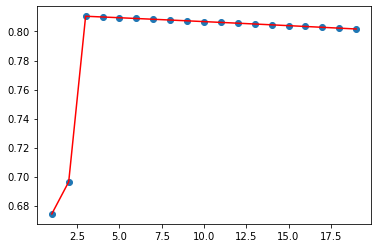

In [109]:
from sklearn.model_selection import cross_validate
X_train, X_test, y_train, y_test = train_test_split(data.reshape(len(data),1), label.reshape(len(label),1), test_size=0.3)
epoch = 20
score = []
for m in range(1,epoch):
    model = make_pipeline(PolynomialFeatures(m, include_bias=True), LinearRegression())
    cv_results = cross_validate(model, X_train, y_train, cv=3)
    score.append(np.average(cv_results['test_score']))
plt.scatter([i for i in range(1, epoch)], score)
plt.plot([i for i in range(1, epoch)], score, 'r')
idx = 0
for i in score :
    idx = idx + 1
    print("{}次项的指标：{}".format(idx, i))
    
best = np.argmax(score)+1
print("最优的为{}次多项式".format(best))


可以看到3次多项式的r2指标最好，下面画出相应的曲线：

注：由于数据真的太小了，有时候会发现2次的是最优的，这很正常。

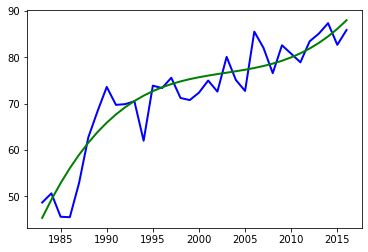

In [110]:
model = make_pipeline(PolynomialFeatures(best, include_bias=True), LinearRegression())
model.fit(X_train, y_train)
res = model.predict(data.reshape(-1,1))
plt.plot(data,label,color = 'blue',linewidth = 2) # 得到源数据图像
plt.plot(data, res,linewidth = 2, color='green')

# 2. 正则化逻辑回归预测学生是否被大学录取
## 2.1 项目任务要求
任务描述：假设你是一个大学系的管理员，你想根据两次考试的结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将利用正则化逻辑回归建立一个预测模型，从而可以根据考试成绩估计入学概率。

具体任务要求如下：
1. 搜集并加载ex2data1.txt数据集（两门成绩和录取状态三个特征属性）。
2. 定义训练集和测试集（训练集和测试集比例分别为：8:2；7:3；6:4）。
3. 建立正则化逻辑回归二分预测模型。
4. 模型用梯度下降法求解。
5. 惩罚参数λ分别取1、0、10、100，阈值取0.5，用正则化逻辑回归预测模型通过测试集预测学生录取几率。
6. 以预测精度来评估上述预测模型的拟合能力。
7. 结果分析。

## 2.2 代码实现

In [97]:
import numpy as np
def get_data(filename):
    '''获得特征矩阵和真实值矩阵'''
    with open(filename, 'r') as fob:
        contents = fob.readlines()
        nums_comma = contents[0].count(",")#获取逗号数量
        nums_data = len(contents)          #获取数据维度
        x = np.zeros((nums_comma, nums_data), np.float32)
        y = np.zeros((1, nums_data), np.float32)
        for i in range(nums_data):
            l = [j for j in contents[i].split(",")]  # .split()函数分割数据,将以逗号分隔的数据储存在l列表中
            for w in range(nums_comma):               #前面nums_comma个数据是特征
                x[w][i] = l[w]
            y[0][i] = l[nums_comma].replace("\n", "") #最后一个是结果真实值
    return x, y

In [98]:
data,label = get_data("./dataset/ex2data1.txt")
data = data.T
label = label.T.flatten()

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
size = len(data)
for i in range(6,10) :
    tr = int(size*i*0.1)
    model.fit(data[:tr], label[:tr])
    res = model.predict(data[tr:])
    print("训练集：{}%，测试集：{}% 准确率: {} ".format(i*10,(10-i)*10, accuracy_score(label[tr:], res.flatten())))


训练集：60%，测试集：40% 准确率: 0.875 
训练集：70%，测试集：30% 准确率: 0.8666666666666667 
训练集：80%，测试集：20% 准确率: 0.9 
训练集：90%，测试集：10% 准确率: 0.9 


In [100]:
size = len(data)
tr = int(size*0.8)
train_x = data[:tr]
train_y = label[:tr]
test_x = data[tr:]
test_y = label[tr:]

for lam in [0.01,0.1,0,1,10,100]:
    if lam == 0:
        model = LogisticRegression(penalty='none')
    else :
        model = LogisticRegression(C=lam)
    model.fit(train_x,train_y)
    res = model.predict(test_x)
    print("labmda = {}, 准确率: {} ".format(lam, sum(test_y == res)/(size-tr)))

labmda = 0.01, 准确率: 0.9 
labmda = 0.1, 准确率: 0.9 
labmda = 0, 准确率: 0.9 
labmda = 1, 准确率: 0.9 
labmda = 10, 准确率: 0.9 
labmda = 100, 准确率: 0.9 
